# Laboratorio - AutoCodificadores

### Julio Herrera 19402 
### Oscar Saravia 19322

## Complete las tareas indicadas abajo

**TAREA: Ejecute las siguientes importaciones**

In [1309]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1310]:
# Otros imports
import numpy as np
import plotly.express as px
from pandas_profiling import ProfileReport

## Los datos

En la tabla que van a trabajar, se encuentra el consumo promedio de 17 tipos de comida, en gramos por persona por semana, para cada país del Reino Unido (UK).

La tabla tiene algunas variaciones interesantes en diferentes tipos de comida, pero a nivel general las diferencias no son tan notables.

**TAREA:  Ejecute la siguiente instrucción para leer los datos**

Es posible que tenga que modificar la instrucción de acuerdo al lugar donde descargó el archivo.

In [1311]:
df = pd.read_csv('UK_foods.csv', index_col = 'Unnamed: 0')

**TAREA: Despliegue el DataFrame**

In [1312]:
#SU CODIGO AQUI
print(df.head())

                England  Wales  Scotland  N.Ireland
Cheese              105    103       103         66
Carcass_meat        245    227       242        267
Other_meat          685    803       750        586
Fish                147    160       122         93
Fats_and_oils       193    235       184        209


In [1313]:

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**TAREA:  Realice la transposición del DataFrame para que las columnas se conviertan en el índice.**

In [1314]:
#SU CODIGO AQUI
# Transpuesta del dataframe
df_t = df.T

In [1315]:
df_t.head()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TAREA:  Cree un mapa de calor a partir del DataFrame.** 

¿Existe algún país que sobresalga por diferencia de los otros?  Puede ser bastante difícil determinar esto solo por la imagen.

¿Habrá algún par de países que parezcan muy similares entre si?



<AxesSubplot:>

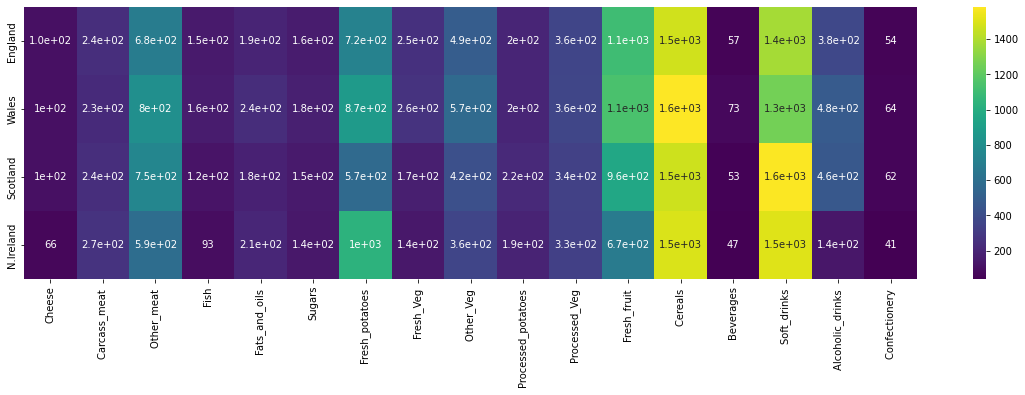

In [1316]:
#SU CODIGO AQUI
# mapa de calor, agrandar resultado
plt.figure(figsize=(20,5))
sns.heatmap(df_t, cmap='viridis', annot=True)

In [1317]:
# 3D heatmap
fig = px.imshow(df_t, labels = dict(x = 'Productos', y = 'Tiendas', color = 'Cantidad'))
fig.show()
#fig.show(renderer = 'browser')

**TAREA:  Realice las importaciones necesarias para construir un AutoCodificador.  La meta será reducir las dimensiones de 17 --> 2 y ver si hay países que resalten como diferentes.**

In [1318]:
#SU CODIGO AQUI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [1319]:
# Optimizador Stochastic Gradient Descent para manipular el learning rate
from tensorflow.keras.optimizers import SGD

**TAREA:  Cree un codificador**

In [1320]:
#SU CODIGO AQUI
# 17 -> 2
codificador = Sequential()
codificador.add(Dense(13, input_shape = (17,), activation = 'relu'))
codificador.add(Dense(9, input_shape = (13,), activation = 'relu'))
codificador.add(Dense(5, input_shape = (9,), activation = 'relu'))
codificador.add(Dense(2, input_shape = (5,), activation = 'relu'))
#codificador.add(Dense(2, input_shape = (len(df_t.columns),), activation = 'relu')) # para una sola capa

**TAREA: Cree un decodificador.**

In [1321]:
#SU CODIGO AQUI
# 2 -> 17
decodificador = Sequential()
decodificador.add(Dense(5, input_shape = (2,), activation = "relu"))
decodificador.add(Dense(9, input_shape = (5,), activation = "relu"))
decodificador.add(Dense(13, input_shape = (9,), activation = "relu"))
decodificador.add(Dense(17, input_shape = (13,), activation = "relu"))
#decodificador.add(Dense(len(df_t.columns), input_shape = (2,), activation = 'relu')) # para una sola capa

**TAREA: Combine el codificador y el decodificador para conformar un AutoCodificador, y complile el modelo.**

In [1322]:
#SU CODIGO AQUI
# 17 -> 2 -> 17
autocodificador = Sequential([codificador, decodificador])
autocodificador.compile(loss = 'mse', optimizer = SGD(learning_rate = 1.5), metrics=['mse'])

**TAREA: Cree un normalizador MinMaxScaler para normalizar (escalar) los datos.  Asegúrese de transponer los datos ya que realmente tenemos 17 columnas (features) y solo 4 filas (uno por país).**

In [1323]:
#SU CODIGO AQUI
from sklearn.preprocessing import MinMaxScaler

In [1324]:
df_t_normalizado = MinMaxScaler().fit_transform(df_t)

In [1325]:
df_t_normalizado

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [1326]:
# NOTA la forma debe ser 17 columnas por 4 filas.

**TAREA:  Ajuste el AutoCodificador a los datos normalizados por medio de 15 épocas.**

In [1327]:
#SU CODIGO AQUI
autocodificador.fit(df_t_normalizado, df_t_normalizado, epochs = 15)

Epoch 1/15
1/1 [==============================] - 0s 287ms/step - loss: 0.4205 - mse: 0.4205
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 0.3527 - mse: 0.3527
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3062 - mse: 0.3062
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2842 - mse: 0.2842
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2755 - mse: 0.2755
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2710 - mse: 0.2710
Epoch 7/15
1/1 [==============================] - 0s 977us/step - loss: 0.2677 - mse: 0.2677
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2639 - mse: 0.2639
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2600 - mse: 0.2600
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2546 - mse: 0.2546
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2369 - mse: 

**TAREA: Pase los datos normalizados solo por el codificador y prediga la salida ya re-dimensionada.  Nota: Lo más seguro es que obtengan resultados diferentes debido a las inicializaciones al azar.**

In [1328]:
#SU CODIGO AQUI
codificado_2dim = codificador.predict(df_t_normalizado)

1/1 [==============================] - 0s 38ms/step


In [1329]:
codificado_2dim.shape

(4, 2)

**TAREA:  Una los datos codificados bidimensionales, con el indice original de países.  Asegúrese de verificar el orden del índice para asegurar que quede unido correctamente.  Hay muchas formas de hacer esto con Pandas.**

In [1330]:
#SU CODIGO AQUI
codificado_2dim

array([[0.        , 1.7812775 ],
       [0.        , 2.6042173 ],
       [0.        , 0.8928632 ],
       [0.15652104, 0.        ]], dtype=float32)

In [1331]:
# Uniendo los datos codificados con los indices originales
codificado_2dim_df = pd.DataFrame(codificado_2dim, index = df_t.index)
codificado_2dim_df

,0,1
England,0.000000,1.781278
Wales,0.000000,2.604217
Scotland,0.000000,0.892863
N.Ireland,0.156521,0.000000


In [1332]:
# put identifier to first column
codificado_2dim_df = codificado_2dim_df.reset_index()
codificado_2dim_df

,index,0,1
0,England,0.000000,1.781278
1,Wales,0.000000,2.604217
2,Scotland,0.000000,0.892863
3,N.Ireland,0.156521,0.000000


**TAREA:  Ahora grafique estos resultados con una gráfica de dispersión, etiquedados por su país respectivo.**

¿Se nota ya algún país que difiera de los otros?  ¿Cuál?

In [1333]:
#SU CODIGO AQUI
# label each point with its store name
fig = px.scatter(codificado_2dim_df, x = 0, y = 1, color = 'index')
#fig.show(renderer = 'browser')
fig.show()

Al regresar a ver los datos en la tabla, esto tiene sentido: los Nor-Irlandeses comen mucho más gramos de papas frescas y mucho menos de frutas frescas, queso, pescado y bebidad alcohólicas.

Es buena seña que la estructura que se visualiza refleje un hecho grande de la geografía real:  Irlanda del Norte es el único de los cuatro países que no están en la isla de Gran Bretaña. (Si tiene confusión entre Inglaterra, el Reino Unido y Gran Bretaña, vea: este [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)